<a href="https://colab.research.google.com/github/vishal-burman/PyTorch-Architectures/blob/master/research/modeling_AutoEncoder/test_sample_ConvolutionalAutoEncoder(Jaccard_Distance).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! git clone https://github.com/vishal-burman/PyTorch-Architectures.git
%cd PyTorch-Architectures/research/modeling_AutoEncoder/

fatal: destination path 'PyTorch-Architectures' already exists and is not an empty directory.
/content/PyTorch-Architectures/research/modeling_AutoEncoder


In [13]:
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from model_ae_conv import ConvolutionalAutoEncoder

In [6]:
###########
# Settings
###########

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device: ', device)

# Hyperparameters
RANDOM_SEED = 456
LEARNING_RATE = 0.005
NUM_EPOCHS = 10
BATCH_SIZE = 128

Device:  cpu


In [8]:
# MNIST Dataset
train_dataset = datasets.MNIST(root="data",
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
valid_dataset = datasets.MNIST(root="data",
                               train=False,
                               transform=transforms.ToTensor(),)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True,)
valid_loader = DataLoader(dataset=valid_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=False)

for images, labels in train_loader:
  print('Images Dimensions: ', images.shape)
  print('Labels Dimensions: ', labels.shape)
  break

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Images Dimensions:  torch.Size([128, 1, 28, 28])
Labels Dimensions:  torch.Size([128])


In [9]:
torch.manual_seed(RANDOM_SEED)
model = ConvolutionalAutoEncoder()
model.to(device)

ConvolutionalAutoEncoder(
  (conv_1): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool_2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (deconv_1): ConvTranspose2d(8, 4, kernel_size=(3, 3), stride=(2, 2))
  (deconv_2): ConvTranspose2d(4, 1, kernel_size=(3, 3), stride=(2, 2))
)

In [10]:
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [11]:
def continuous_jaccard(x, y):
  c = torch.cat((x.view(-1).unsqueeze(1), y.view(-1).unsqueeze(1)), dim=1)

  numerator = torch.sum(torch.min(c, dim=1)[0])
  denominator = torch.sum(torch.max(c, dim=1)[0])

  return 1. - numerator/denominator

In [12]:
# Check jaccard_distance function
x_sample = torch.rand(4, 1, 28, 28)
y_sample = torch.rand(4, 1, 28, 28)
dist = continuous_jaccard(x_sample, y_sample)
print(dist)

tensor(0.5042)


In [15]:
model.train()
start_time = time.time()
for epoch in range(NUM_EPOCHS):
  for idx, (features, targets) in enumerate(train_loader):
    features = features.to(device)

    logits, decoded = model(features)
    cost = continuous_jaccard(features, decoded)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # LOGGING
    if idx % 50 == 0:
      print('Epoch: %04d/%04d || Batch: %04d/%04d || Loss: %.2f' % (epoch+1, NUM_EPOCHS, idx, len(train_loader), cost.item()))
  epoch_elapsed_time = (time.time() - start_time) / 60
  print('Epoch Elapsed Time: %.2f' % (epoch_elapsed_time))
total_training_time = (time.time() - start_time) / 60
print('Total Training Time: %.2f' % (total_training_time))

Epoch: 0001/0010 || Batch: 0000/0469 || Loss: 0.86
Epoch: 0001/0010 || Batch: 0050/0469 || Loss: 0.80
Epoch: 0001/0010 || Batch: 0100/0469 || Loss: 0.78
Epoch: 0001/0010 || Batch: 0150/0469 || Loss: 0.74
Epoch: 0001/0010 || Batch: 0200/0469 || Loss: 0.41
Epoch: 0001/0010 || Batch: 0250/0469 || Loss: 0.29
Epoch: 0001/0010 || Batch: 0300/0469 || Loss: 0.27
Epoch: 0001/0010 || Batch: 0350/0469 || Loss: 0.26
Epoch: 0001/0010 || Batch: 0400/0469 || Loss: 0.26
Epoch: 0001/0010 || Batch: 0450/0469 || Loss: 0.26
Epoch Elapsed Time: 0.35
Epoch: 0002/0010 || Batch: 0000/0469 || Loss: 0.25
Epoch: 0002/0010 || Batch: 0050/0469 || Loss: 0.25
Epoch: 0002/0010 || Batch: 0100/0469 || Loss: 0.25
Epoch: 0002/0010 || Batch: 0150/0469 || Loss: 0.24
Epoch: 0002/0010 || Batch: 0200/0469 || Loss: 0.24
Epoch: 0002/0010 || Batch: 0250/0469 || Loss: 0.24
Epoch: 0002/0010 || Batch: 0300/0469 || Loss: 0.24
Epoch: 0002/0010 || Batch: 0350/0469 || Loss: 0.24
Epoch: 0002/0010 || Batch: 0400/0469 || Loss: 0.22
Epoch:

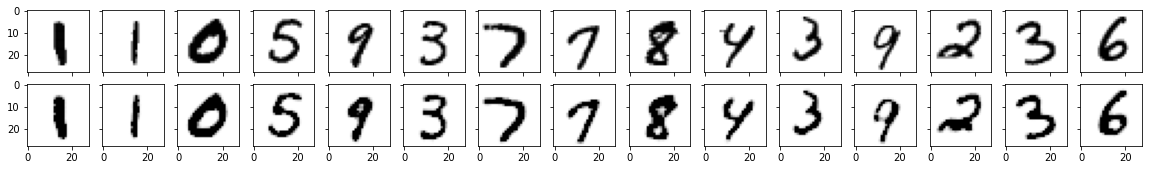

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

##########################
### VISUALIZATION
##########################

n_images = 15
image_width = 28

fig, axes = plt.subplots(nrows=2, ncols=n_images, 
                         sharex=True, sharey=True, figsize=(20, 2.5))
orig_images = features[:n_images]
decoded_images = decoded[:n_images]

for i in range(n_images):
    for ax, img in zip(axes, [orig_images, decoded_images]):
        curr_img = img[i].detach().to(torch.device('cpu'))
        ax[i].imshow(curr_img.view((image_width, image_width)), cmap='binary')